 # Credit Card Fraud detection Using Machine learning.

## Importing Dependencies.

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




In [2]:


# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset.

In [4]:
data = pd.read_csv('creditcard.csv')

# EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
pd.options.display.max_columns = None

## Dataset Head

```
# This is formatted as code
```



---



In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# from matplotlib import pyplot as plt
# _df_2['V2'].plot(kind='hist', bins=20, title='V2')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# from matplotlib import pyplot as plt
# _df_0['Time'].plot(kind='hist', bins=20, title='Time')
# plt.gca().spines[['top', 'right',]].set_visible(False)

## Dataset Tail

In [9]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Dataset shape (Number of Rows And Number of Columns)




In [10]:
data.shape

(284807, 31)

In [11]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


## Dataset Information in details.**bold text**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Null Values In The Dataset

In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Feature Scaling

In [14]:
std_scaler = StandardScaler()
data['Amount']=std_scaler.fit_transform(pd.DataFrame(data['Amount']))

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
data = data.drop(['Time'],axis=1)

In [17]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [18]:
data.shape

(284807, 30)

In [19]:
# check if there are any duplicates in the dataset.

data.duplicated().any()

True

## Removing all Duplicated Values

In [20]:
data = data.drop_duplicates()

In [21]:
data.shape

(275663, 30)

In [22]:
284807- 275663

9144

## Class shape (Imbalanced)

In [23]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [24]:
# prompt: plot the distribution of the dataset features

# sns.pairplot(data=data, hue='Class')
# plt.show()


In [25]:
# sns.countplot(data['Class'])

# DATA SPLITTING

## Store Feature Matrix In X And Response (Target) In Vector y

In [26]:
X = data.drop('Class',axis=1)
y = data['Class']

## Splitting The Dataset Into The Training Set And Test Set

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# HANDLING IMBALANCED DATASET

## Undersampling

In [28]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [29]:
normal.shape

(275190, 30)

In [30]:
fraud.shape

(473, 30)

In [31]:
normal_sample=normal.sample(n=473)

In [32]:
normal_sample.shape

(473, 30)

In [33]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [34]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [35]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.112504,0.801648,2.208333,1.499582,-0.386328,1.143993,-0.247105,0.714914,0.330399,-0.188158,0.548281,1.567946,0.076935,-0.612271,-2.083110,-1.437844,0.945559,-0.608379,1.594142,0.107893,-0.315279,-0.320177,-0.038727,0.040956,-0.069415,-0.426277,0.028839,-0.120154,-0.312529,0
1,2.307972,-1.524355,-0.840302,-1.589562,-1.394774,-0.424624,-1.419824,-0.017047,-0.777074,1.598622,-1.509520,-1.762509,-1.159293,-0.239919,0.169417,-0.277497,0.440377,0.314257,-0.118751,-0.515819,-0.184487,-0.107257,0.293811,0.509221,-0.292685,-0.193683,0.011216,-0.043626,-0.305252,0
2,-3.583557,-3.908531,2.033380,1.519413,4.022362,-3.569249,-2.689987,0.445033,0.448662,-0.185455,-0.975760,-0.158555,-0.845310,0.319010,0.586430,0.242347,-0.581191,0.610241,-0.986707,0.943589,0.688329,0.665744,0.643373,0.404409,-0.004872,-0.612807,0.024691,0.258959,-0.349231,0
3,-2.602551,0.491177,0.579746,-1.008148,0.927026,5.509288,-3.226492,-0.136380,0.892433,-1.881141,-1.534709,0.903721,-0.487699,-0.227553,-1.443617,0.108549,0.477748,0.105455,-0.110925,0.490012,-1.141050,0.864461,-0.318271,0.780838,0.479616,0.589695,0.020985,-0.094644,-0.326442,0
4,2.022227,-0.364891,-1.259820,0.591478,-0.049588,-0.396316,-0.151608,-0.051849,1.107747,0.071412,-1.463324,-0.503226,-1.677639,0.327270,-0.331956,-0.358825,-0.014651,-0.335194,0.069365,-0.294700,0.048113,0.305882,0.091582,0.624628,0.089942,0.437735,-0.062237,-0.060841,-0.285582,0


In [36]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# Logistic Regression

In [38]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1 = log.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred1)

0.9368421052631579

In [42]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [43]:
precision_score(y_test,y_pred1)

0.96875

In [44]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [45]:
f1_score(y_test,y_pred1)

0.9393939393939394

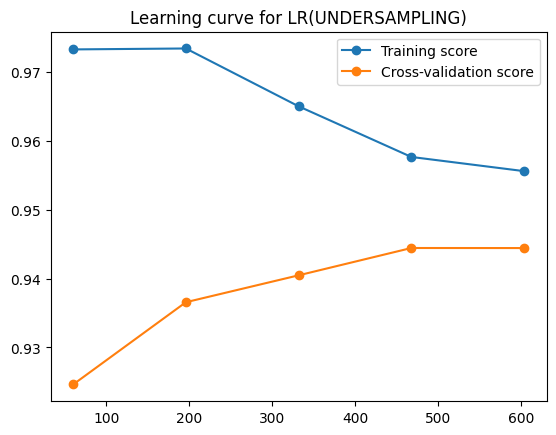

In [46]:


from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(log, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.title('Learning curve for LR(UNDERSAMPLING)')
plt.legend()
plt.show()


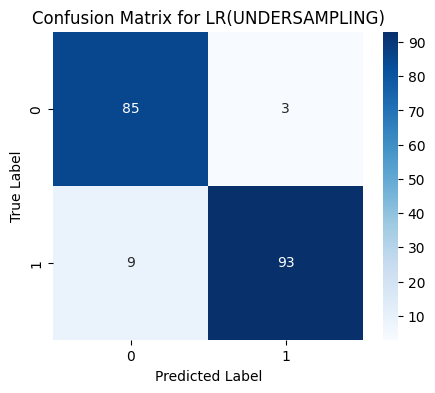

In [47]:
#

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred1)
# 
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LR(UNDERSAMPLING)')
plt.show()


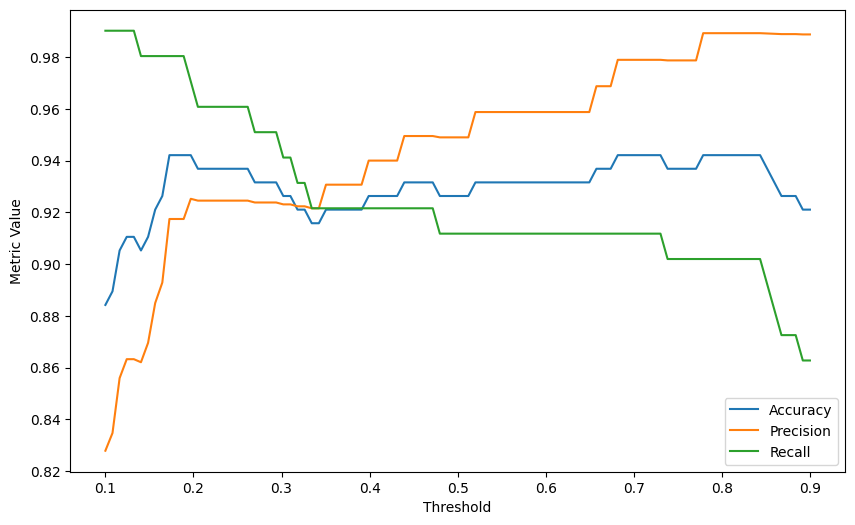

In [48]:


# Calculate the accuracy, precision, and recall for different thresholds
thresholds = np.linspace(0.1, 0.9, 100)
accuracy = []
precision = []
recall = []

for threshold in thresholds:
    y_pred = (log.predict_proba(X_test)[:, 1] > threshold).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


Accuracy: 0.9315789473684211
Precision: 0.978494623655914
Recall: 0.8921568627450981
F1 score: 0.9333333333333333


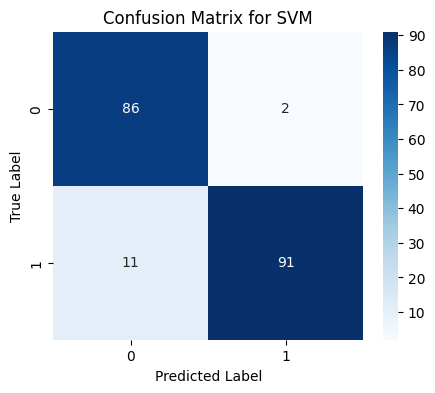

In [49]:
# 

from sklearn import svm

# Create a support vector machine classifier
clf = svm.SVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()


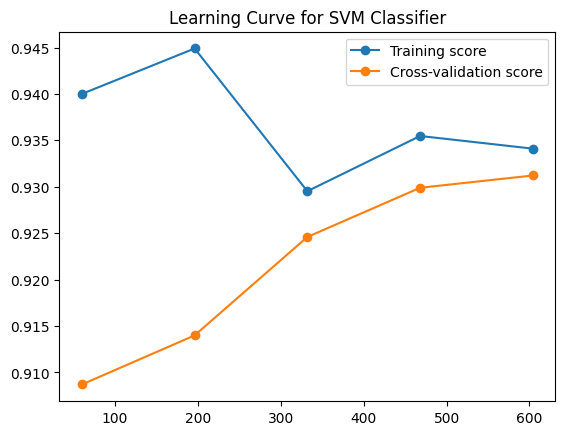

In [50]:
# prompt: 

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.title('Learning Curve for SVM Classifier')
plt.legend()
plt.show()


# Gaussian Boosting Classifier

Accuracy: 0.9421052631578948
Precision: 0.9690721649484536
Recall: 0.9215686274509803
F1 score: 0.9447236180904522


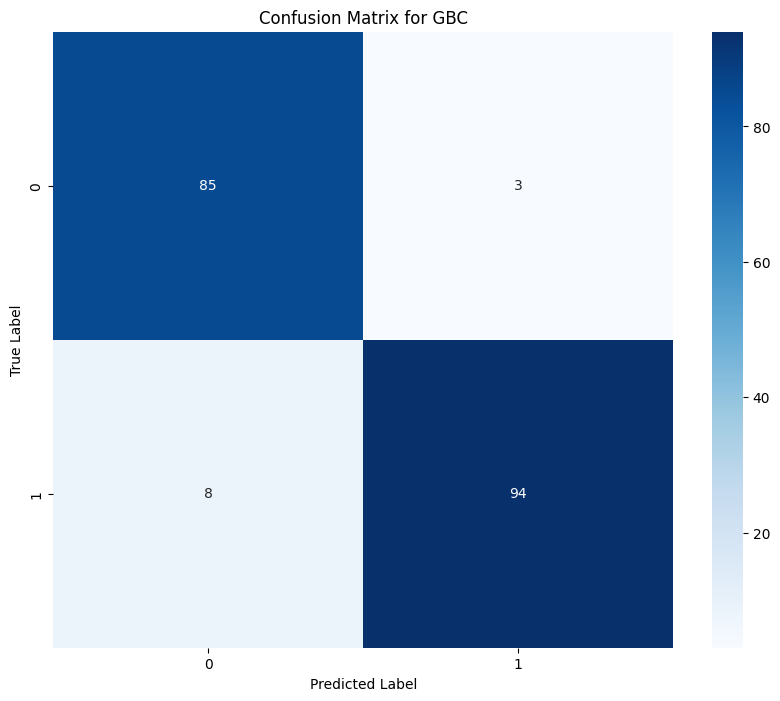

In [51]:
# 

from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
gbc = GradientBoostingClassifier()

# Fit the classifier to the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GBC')
plt.show()


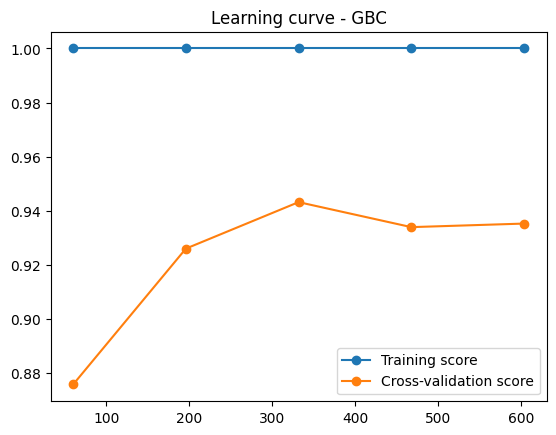

In [52]:
# 

train_sizes, train_scores, test_scores = learning_curve(gbc, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.title('Learning curve - GBC')
plt.legend()
plt.show()


# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred2 = dt.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred2)

0.9052631578947369

In [56]:
precision_score(y_test,y_pred2)

0.8962264150943396

In [57]:
recall_score(y_test,y_pred2)

0.9313725490196079

In [58]:
f1_score(y_test,y_pred2)

0.9134615384615384

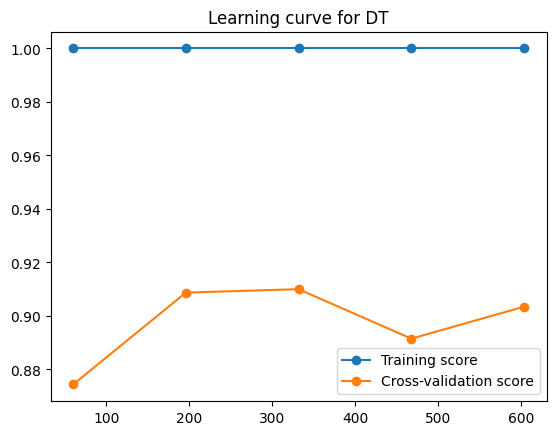

In [61]:


train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.title('Learning curve for DT')
plt.legend()
plt.show()


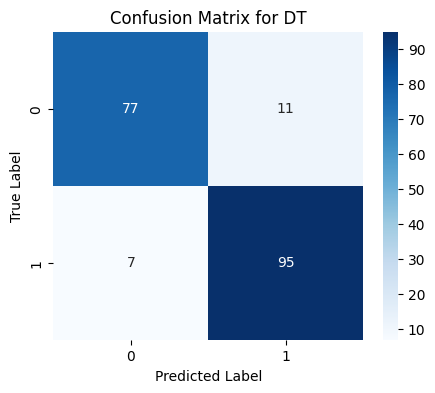

In [62]:
# prompt: plot the confusion matrix for this model.

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for DT')
plt.show()


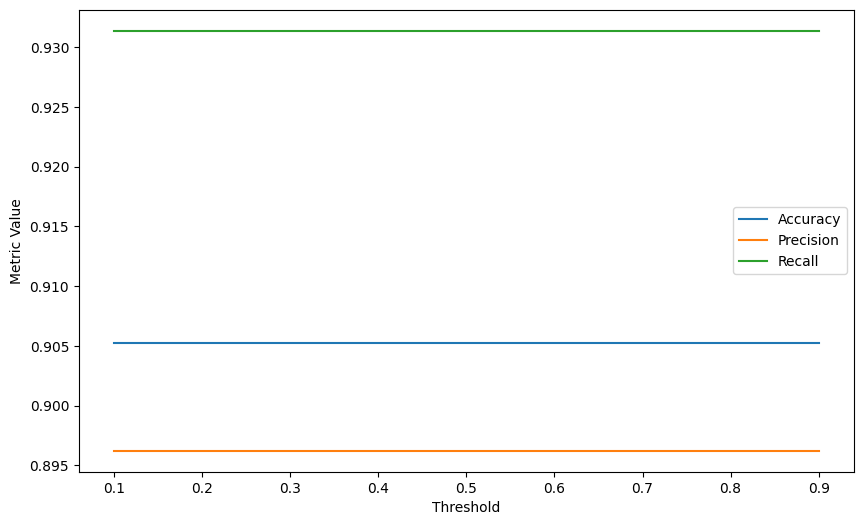

In [63]:

# Calculate the accuracy, precision, and recall for different thresholds
thresholds = np.linspace(0.1, 0.9, 100)
accuracy = []
precision = []
recall = []

for threshold in thresholds:
    y_pred = (dt.predict_proba(X_test)[:, 1] > threshold).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, precision, label='Precision')
plt.plot(thresholds, recall, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred3 = rf.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred3)

0.9315789473684211

In [67]:
precision_score(y_test,y_pred3)

0.968421052631579

In [68]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [69]:
f1_score(y_test,y_pred3)

0.934010152284264

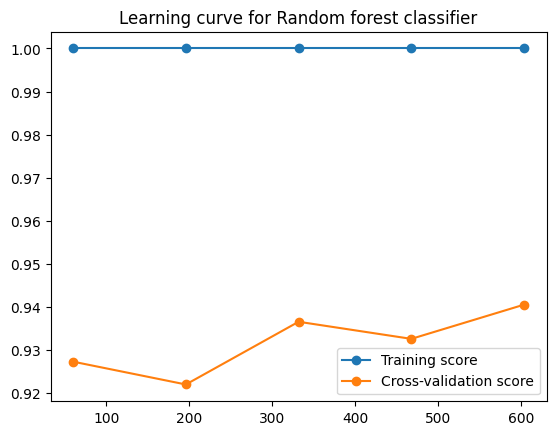

In [70]:


train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.title('Learning curve for Random forest classifier')
plt.legend()
plt.show()


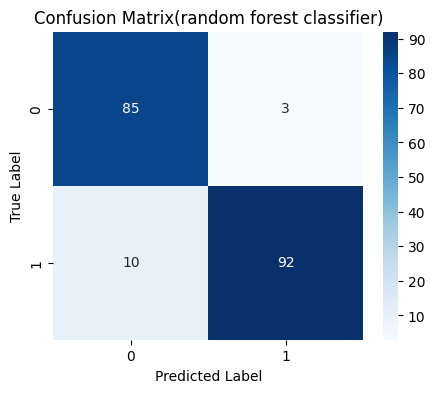

In [71]:
#

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix(random forest classifier)')
plt.show()


In [72]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACCURACY":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [73]:

final_precision = pd.DataFrame({'Models':['LR','DT','RF'],
              "PRECISION":[precision_score(y_test,y_pred1)*100,
                     precision_score(y_test,y_pred2)*100,
                     precision_score(y_test,y_pred3)*100
                    ]})

final_recall = pd.DataFrame({'Models':['LR','DT','RF'],
              "RECALL":[recall_score(y_test,y_pred1)*100,
                     recall_score(y_test,y_pred2)*100,
                     recall_score(y_test,y_pred3)*100
                    ]})


In [74]:
final_data

,Models,ACCURACY
0,LR,92.631579
1,DT,90.526316
2,RF,93.157895


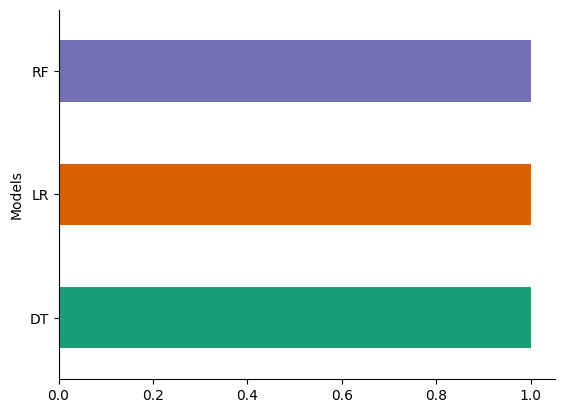

In [75]:


from matplotlib import pyplot as plt
import seaborn as sns
final_data.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [76]:
# sns.barplot(final_data['Models'],final_data['ACC'])

In [77]:
final_precision

,Models,PRECISION
0,LR,94.897959
1,DT,89.622642
2,RF,96.842105


<Axes: xlabel='Models'>

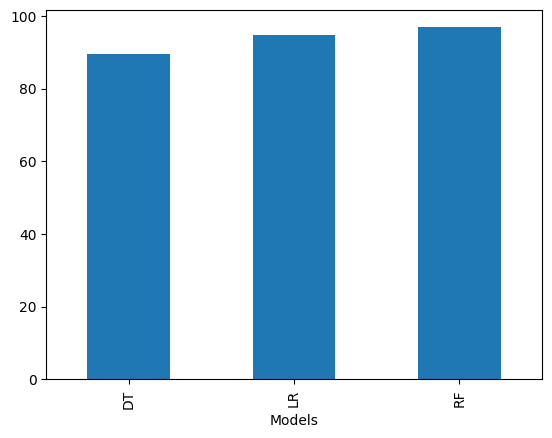

In [78]:
# @title Average Precision Score by Model

final_precision.groupby('Models')['PRECISION'].mean().plot(kind='bar')

<Axes: xlabel='Models', ylabel='PRECISION'>

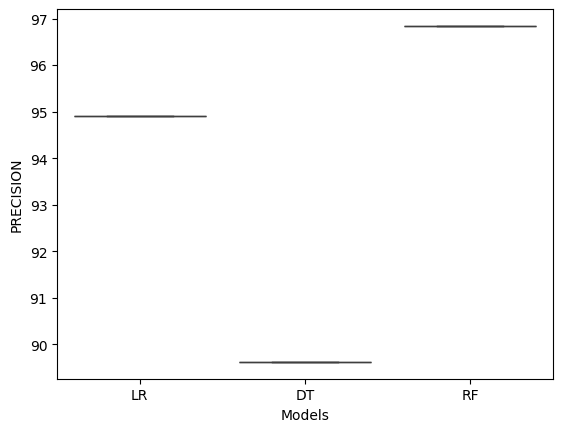

In [79]:
# @title Distribution of Precision by Model

sns.boxplot(x = "Models", y = "PRECISION", data=final_precision)

# Oversampling

In [48]:
X = data.drop('Class',axis=1)
y = data['Class']

In [49]:
X.shape

(275663, 29)

In [50]:
y.shape

(275663,)

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [53]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# Logistic Regression

In [55]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred1 = log.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred1)

0.9461281296558741

In [58]:
precision_score(y_test,y_pred1)

0.9728651544643373

In [59]:
recall_score(y_test,y_pred1)

0.9177863025653146

In [60]:
f1_score(y_test,y_pred1)

0.9445234442240766

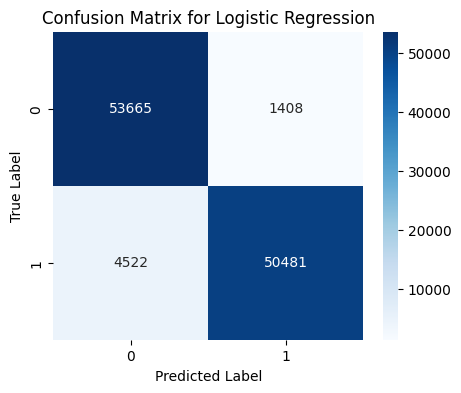

In [61]:
# prompt: plot the learning curves and the confusion matrix of this algorithm

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()





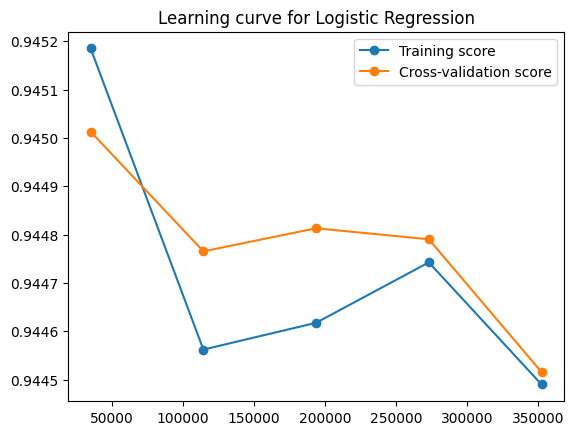

In [62]:

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(log, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.legend()
plt.title('Learning curve for Logistic Regression')
plt.show()

# Support Vector Machine(SVM) Classifier

In [63]:


# # Create a support vector machine classifier
# from sklearn import svm
# clf = svm.SVC()

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = clf.predict(X_test)

# # Evaluate the performance of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 score:", f1)

# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()


# Gaussian Boosting Classifier

In [97]:


# # Create a GaussianBoostingClassifier object
# gbc = GradientBoostingClassifier()

# # Fit the classifier to the training data
# gbc.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = gbc.predict(X_test)

# # Evaluate the performance of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 score:", f1)

# # Compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

# # Plot learning curve
# train_sizes, train_scores, test_scores = learning_curve(gbc, X_train, y_train, cv=5)
# plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
# plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
# plt.legend()
# plt.show()


# Decision Tree Classifier

In [98]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
y_pred2 = dt.predict(X_test)

In [100]:
accuracy_score(y_test,y_pred2)

0.9980377193938733

In [101]:
precision_score(y_test,y_pred2)

0.997060477944512

In [102]:
recall_score(y_test,y_pred2)

0.9990182353689798

In [103]:
f1_score(y_test,y_pred2)

0.9980383965708266

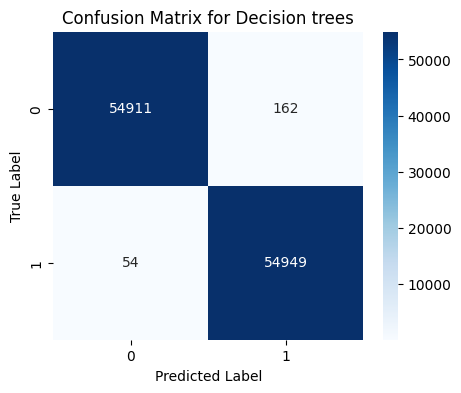

In [105]:
# 


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision trees')
plt.show()


In [104]:

# Plot learning curve
# train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5)
# plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
# plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
# plt.title('Learning curve for Decision trees')
# plt.legend()
# plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

In [ ]:
precision_score(y_test,y_pred3)

In [ ]:
recall_score(y_test,y_pred3)

In [ ]:
f1_score(y_test,y_pred3)

In [ ]:
#

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix(random forest classifier)')
plt.show()


In [ ]:

# train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)
# plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
# plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
# plt.title('Learning curve for Random forest classifier')
# plt.legend()
# plt.show()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
final_data.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# sns.barplot(final_data['Models'],final_data['ACC'])

# Save The Model

In [117]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [118]:
import joblib

In [119]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [120]:
model = joblib.load("credit_card_model")

In [121]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [122]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
